In [496]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [497]:
# Load the dataset
bike_sharing_demand_df = pd.read_csv("intro_to_github_dir/project/Bike_Sharing_Demand/bike-sharing-demand.csv")

# Display the first few rows to confirm loading
bike_sharing_demand_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [498]:
#structure of data: columnnes, data type and null vals. Broader picture of the dataset
bike_sharing_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [499]:
# the dataframe has 10886 data point (samples), with 12 columns which are attributes. 11 atributes to describe weather and and bike usage patterns
# Dtype: there is not null values in any column. int64: integers, float64: decimal numb and object(datetime): text or dates as a string
# memory usage in the comp, aprox 1 megabyte
# int64 works like a categorical data because describe numerical codification labels

In [500]:
# columns of the data set
# to know attributes, to verify column names

bike_sharing_demand_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [501]:
# statistical summary 
bike_sharing_demand_df.describe

#temp: real temp, atem: feels like

<bound method NDFrame.describe of                datetime  season  holiday  workingday  weather   temp   atemp  \
0      01/01/2011 00:00       1        0           0        1   9.84  14.395   
1      01/01/2011 01:00       1        0           0        1   9.02  13.635   
2      01/01/2011 02:00       1        0           0        1   9.02  13.635   
3      01/01/2011 03:00       1        0           0        1   9.84  14.395   
4      01/01/2011 04:00       1        0           0        1   9.84  14.395   
...                 ...     ...      ...         ...      ...    ...     ...   
10881  19/12/2012 19:00       4        0           1        1  15.58  19.695   
10882  19/12/2012 20:00       4        0           1        1  14.76  17.425   
10883  19/12/2012 21:00       4        0           1        1  13.94  15.910   
10884  19/12/2012 22:00       4        0           1        1  13.94  17.425   
10885  19/12/2012 23:00       4        0           1        1  13.12  16.665   

     

In [502]:
#Data cleaning:
# (1) finding: null values per column

bike_sharing_demand_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [503]:
# Mostrar filas que tengan al menos un valor nulo
filas_nulas = bike_sharing_demand_df[bike_sharing_demand_df.isna().any(axis=1)]
print(filas_nulas)


Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


In [504]:
promedio_count = bike_sharing_demand_df["count"].mean()
print(promedio_count)

191.57413191254824


In [505]:
bike_sharing_demand_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [506]:
#getting the hour into a new column, splitting datetime
#datatime needs to be converted from object type to numerical
bike_sharing_demand_df["datetime"] = pd.to_datetime(bike_sharing_demand_df["datetime"], 
                                                    dayfirst=True)
# new column=hour
bike_sharing_demand_df["hour"] = bike_sharing_demand_df["datetime"].dt.hour

In [507]:
bike_sharing_demand_df.describe

<bound method NDFrame.describe of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  
0      

In [508]:
bike_sharing_demand_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hour                   int32
dtype: object

In [509]:
# Ver categorías únicas de cada variable

print("season:", bike_sharing_demand_df['season'].unique())
print("holiday:", bike_sharing_demand_df['holiday'].unique())
print("workingday:", bike_sharing_demand_df['workingday'].unique())
print("weather:", bike_sharing_demand_df['weather'].unique())

season: [1 2 3 4]
holiday: [0 1]
workingday: [0 1]
weather: [1 2 3 4]


In [510]:
bike_sharing_demand_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [511]:
#grouping by season and temp for relationship
bike_sharing_demand_df.groupby("season")["temp"].mean()

season
1    12.530491
2    22.823483
3    28.789111
4    16.649239
Name: temp, dtype: float64

In [512]:
#Season: (1)winter, (2)spring, (3)summer, (4) autumn
#Holiday: (0) non-work day, Sat-Sun (1) official holiday
#Workingday: (0) weekend or holiday, (1) Mon-Fri
# weather:(1)clear sky, few clouds (2)fog, broken clouds (3)Light rain, light snow (4)Heavy rain, heavy snow, or thunderstorms.

#there are few data with whether(4), it could be outliners

In [513]:
# Vuelve a cargar el dataset desde el archivo original (ajusta la ruta si es distinta)
bike_sharing_demand_df = pd.read_csv("intro_to_github_dir/project/Bike_Sharing_Demand/bike-sharing-demand.csv")

# Asegúrate de no convertir nada aún
print(bike_sharing_demand_df["season"].unique())
print(bike_sharing_demand_df["season"].dtype)

[1 2 3 4]
int64


In [514]:
#rename season attribute to clarify 
bike_sharing_demand_df["season"] = bike_sharing_demand_df["season"].map({
    1: "Invierno",
    2: "Primavera",
    3: "Verano",
    4: "Otoño"
}).astype("category")

#category type
print(bike_sharing_demand_df["season"].unique())

['Invierno', 'Primavera', 'Verano', 'Otoño']
Categories (4, object): ['Invierno', 'Otoño', 'Primavera', 'Verano']


In [515]:
# Ver los primeros valores únicos y su tipo
print("Valores únicos de 'season':", bike_sharing_demand_df["season"].unique())
print("\nTipo de datos en 'season':", bike_sharing_demand_df["season"].dtype)

# Ver también los primeros valores tal cual están en el dataframe
print("\nPrimeros 10 valores de 'season':")
print(bike_sharing_demand_df["season"].head(10))

Valores únicos de 'season': ['Invierno', 'Primavera', 'Verano', 'Otoño']
Categories (4, object): ['Invierno', 'Otoño', 'Primavera', 'Verano']

Tipo de datos en 'season': category

Primeros 10 valores de 'season':
0    Invierno
1    Invierno
2    Invierno
3    Invierno
4    Invierno
5    Invierno
6    Invierno
7    Invierno
8    Invierno
9    Invierno
Name: season, dtype: category
Categories (4, object): ['Invierno', 'Otoño', 'Primavera', 'Verano']


In [516]:
# Statistics by season
print("Rented Bikes by Season:")
print(bike_sharing_demand_df.groupby("season", observed=True)["count"].agg(["mean", "median", "std"]).round(2))

Rented Bikes by Season:
             mean  median     std
season                           
Invierno   116.34    78.0  125.27
Otoño      198.99   161.0  177.62
Primavera  215.25   172.0  192.01
Verano     234.42   195.0  197.15


In [517]:
# Vuelve a cargar el dataset desde el archivo original (ajusta la ruta si es distinta)
bike_sharing_demand_df = pd.read_csv("intro_to_github_dir/project/Bike_Sharing_Demand/bike-sharing-demand.csv")

# Asegúrate de no convertir nada aún
print(bike_sharing_demand_df["weather"].unique())
print(bike_sharing_demand_df["weather"].dtype)

[1 2 3 4]
int64


In [518]:
#rename wether attribute to clarify
bike_sharing_demand_df["weather"] = bike_sharing_demand_df["weather"].map({
    1: "Clear",
    2: "Fog/Clouds",
    3: "Light rain/Snow",
    4: "Thunderstorm/Heavy rain"
})

#category type 
bike_sharing_demand_df["weather"] = bike_sharing_demand_df["weather"].astype("category")
print(bike_sharing_demand_df["weather"].unique())


['Clear', 'Fog/Clouds', 'Light rain/Snow', 'Thunderstorm/Heavy rain']
Categories (4, object): ['Clear', 'Fog/Clouds', 'Light rain/Snow', 'Thunderstorm/Heavy rain']


In [519]:
# Ver los primeros valores únicos y su tipo
print("Valores únicos de 'weather':", bike_sharing_demand_df["weather"].unique())
print("\nTipo de datos en 'weather':", bike_sharing_demand_df["weather"].dtype)

# Ver también los primeros valores tal cual están en el dataframe
print("\nPrimeros 10 valores de 'weather':")
print(bike_sharing_demand_df["weather"].head(10))

Valores únicos de 'weather': ['Clear', 'Fog/Clouds', 'Light rain/Snow', 'Thunderstorm/Heavy rain']
Categories (4, object): ['Clear', 'Fog/Clouds', 'Light rain/Snow', 'Thunderstorm/Heavy rain']

Tipo de datos en 'weather': category

Primeros 10 valores de 'weather':
0         Clear
1         Clear
2         Clear
3         Clear
4         Clear
5    Fog/Clouds
6         Clear
7         Clear
8         Clear
9         Clear
Name: weather, dtype: category
Categories (4, object): ['Clear', 'Fog/Clouds', 'Light rain/Snow', 'Thunderstorm/Heavy rain']


In [520]:
# Statistics by weather
print("\nEstadísticas por Weather:")
print(bike_sharing_demand_df.groupby("weather", observed=True)["count"].agg(["mean", "median", "std"]).round(2))



Estadísticas por Weather:
                           mean  median     std
weather                                        
Clear                    205.24   161.0  187.96
Fog/Clouds               178.96   134.0  168.37
Light rain/Snow          118.85    71.0  138.58
Thunderstorm/Heavy rain  164.00   164.0     NaN


In [521]:
# data numbers by catgory
print(bike_sharing_demand_df["weather"].value_counts())

weather
Clear                      7192
Fog/Clouds                 2834
Light rain/Snow             859
Thunderstorm/Heavy rain       1
Name: count, dtype: int64


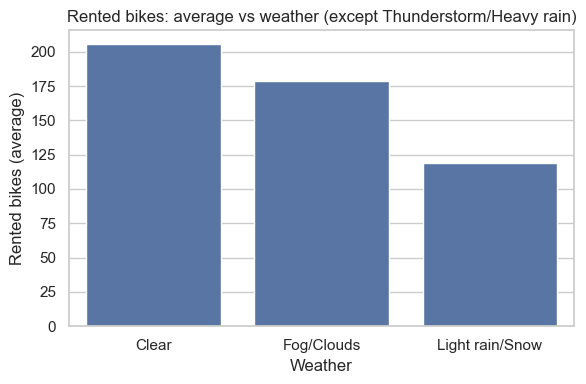

In [522]:
# Filter dataframe: as thunderstorm/heavy rain result has only one data, it can be avoided
# and using a copy of the data
weather_filtered = bike_sharing_demand_df[bike_sharing_demand_df["weather"] != "Thunderstorm/Heavy rain"].copy()

#converting to obeject type (thenderstorm/heavy rain)
weather_filtered["weather"] = weather_filtered["weather"].astype(str)

# creation of bar charts: average of rented bikes by weather
# Averagy by weather datatype 
weather_avg_filtered = weather_filtered.groupby("weather", observed=True)["count"].mean().reset_index()

#style
sns.set(style="whitegrid")

#creation of bar charts: average of rented bikes
#graphic
plt.figure(figsize=(6,4))
sns.barplot(x="weather", y="count", data=weather_avg_filtered, errorbar=None)
plt.title("Rented bikes: average vs weather (except Thunderstorm/Heavy rain)")
plt.ylabel("Rented bikes (average)")
plt.xlabel("Weather")
plt.xticks()
plt.tight_layout()
plt.show()


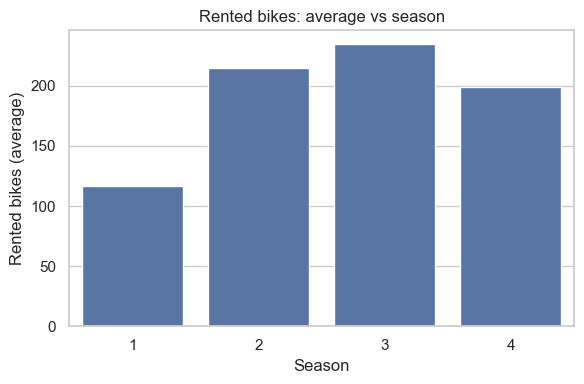

In [523]:
# Rented bikes by season
# Asegurar que season sea tipo string para evitar categorías vacías
bike_sharing_demand_df["season"] = bike_sharing_demand_df["season"].astype(str)

# Agrupar y calcular promedios por season
season_avg = bike_sharing_demand_df.groupby("season", observed=True)["count"].mean().reset_index()

# Gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x="season", y="count", data=season_avg, errorbar=None)
plt.title("Rented bikes: average vs season")
plt.ylabel("Rented bikes (average)")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

In [524]:
bike_sharing_demand_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [525]:
# holiday(1), no holiday(0)
#Hay 10,575 registros (horas) donde no es un día festivo (0), 311 registros (horas) donde sí es un día festivo (1)

In [526]:
bike_sharing_demand_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [527]:
# comparation of the use of bikes between holidays and workingdays. target(count column)

<function matplotlib.pyplot.show(close=None, block=None)>

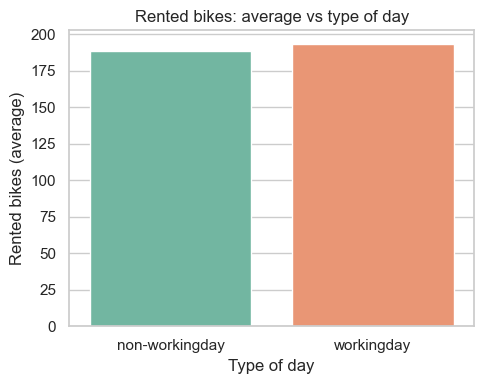

In [528]:
#style
sns.set(style="whitegrid")

# creation of bar charts: average of rented bikes
workingday_avg = bike_sharing_demand_df.groupby("workingday")["count"].mean().reset_index()

# replace 0 and 1 (more readable labels): 
workingday_avg["workingday"]= workingday_avg["workingday"].replace({0:"non-workingday", 1:"workingday"})

# graphic
plt.figure(figsize=(5,4))
sns.barplot(x="workingday", y="count", hue="workingday", data=workingday_avg, palette="Set2", legend=False) 
plt.title("Rented bikes: average vs type of day")
plt.xlabel("Type of day")
plt.ylabel("Rented bikes (average)")
plt.tight_layout()
plt.show

In [529]:
print(bike_sharing_demand_df.head())

           datetime season  holiday  workingday weather  temp   atemp  \
0  01/01/2011 00:00      1        0           0   Clear  9.84  14.395   
1  01/01/2011 01:00      1        0           0   Clear  9.02  13.635   
2  01/01/2011 02:00      1        0           0   Clear  9.02  13.635   
3  01/01/2011 03:00      1        0           0   Clear  9.84  14.395   
4  01/01/2011 04:00      1        0           0   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [530]:
#Data cleaning
#(2) validation data type: data are converted to categorical type
bike_sharing_demand_df["season"] = bike_sharing_demand_df["season"].astype("category")
bike_sharing_demand_df["holiday"] = bike_sharing_demand_df["holiday"].astype("category")
bike_sharing_demand_df["workingday"] = bike_sharing_demand_df["workingday"].astype("category")
bike_sharing_demand_df["weather"] = bike_sharing_demand_df["weather"].astype("category")

bike_sharing_demand_df.info()
bike_sharing_demand_df["season"].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


CategoricalDtype(categories=['1', '2', '3', '4'], ordered=False, categories_dtype=object)

In [532]:
# elimanation of non-numeric column, it´s not needed.
bike_sharing_numerics = bike_sharing_demand_df.drop(columns=["datetime"])

#correlation between attributes (only numeric data)
corr_matrix = bike_sharing_numerics.corr()

#show result
corr_matrix


ValueError: could not convert string to float: 'Clear'

<function matplotlib.pyplot.show(close=None, block=None)>

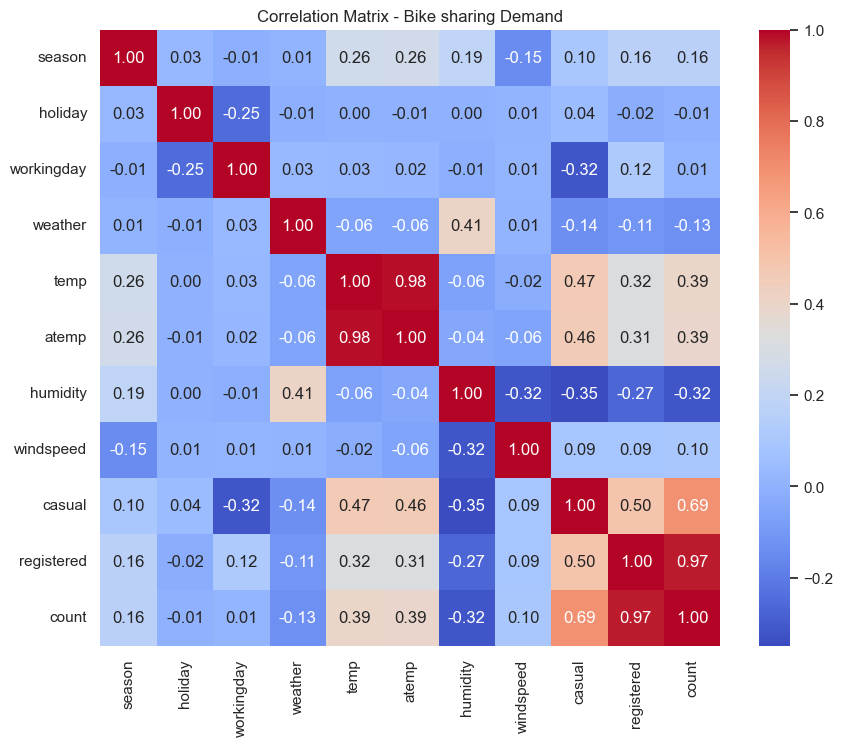

In [533]:
#correlation between all the attributes. the Pearson coefficient shows that: 
#-1, there is a negative correlation, while 1 is positive correlation. 
#value of 0, means there is no correlation between attributes, eg. holiday and temp or windspeed, which show values near 0 
#


#display as a graphic, as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Bike sharing Demand")
plt.show

In [183]:
#Data cleaning (continuation)
#(3)Duplicates

duplicados =  bike_sharing_demand_df.duplicated().sum()
print(f"Duduplicados encontrados: {duplicados}")

Duduplicados encontrados: 0


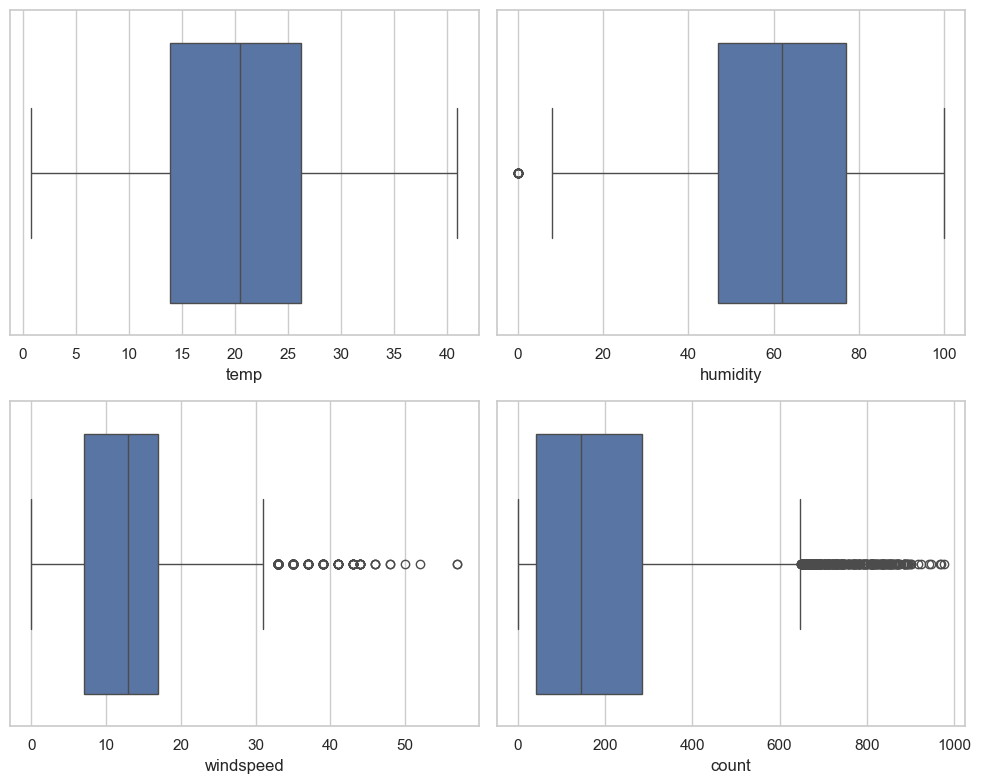

In [218]:
#Data cleaning (continuation)
#(4)Outliers for numerical attributes using boxplots

fig, axes = plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(x=bike_sharing_demand_df['temp'], ax=axes[0,0])
sns.boxplot(x=bike_sharing_demand_df['humidity'], ax=axes[0,1])
sns.boxplot(x=bike_sharing_demand_df['windspeed'], ax=axes[1,0])
sns.boxplot(x=bike_sharing_demand_df['count'], ax=axes[1,1])
plt.tight_layout()
plt.show()


In [222]:
bike_sharing_demand_df["windspeed"].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [226]:
bike_sharing_demand_df["windspeed"].median()

12.998

In [223]:
#windespeed=0 
bike_sharing_demand_df[bike_sharing_demand_df["windspeed"] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10826,17/12/2012 12:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232
10829,17/12/2012 15:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211
10846,18/12/2012 08:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662
10860,18/12/2012 22:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132


In [224]:
(bike_sharing_demand_df["windspeed"] == 0).sum()

1313

In [225]:
#son muchos los valores 0 en windspeed, y no se podria eliminar, se podría perder información útil.
#se podria reemplazar los ceros con un valor razonable, por ejemplo, la mediana.
#Análisis para imputar los 0

#Calculate median without counting zeros
median_windspeed = bike_sharing_demand_df[bike_sharing_demand_df["windspeed"] != 0]["windspeed"].median()

In [227]:
#confirmation of the replacement
(bike_sharing_demand_df["windspeed"] == 0).sum()

1313

In [534]:
bike_sharing_demand_df.to_csv("bike_sharing_cleaned.csv", index=False)